### Payoffs e funzioni profitto perdita con call e put
Yan Python for Finance second edition (2017) pag. 341

In [183]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
#import mibian

Convenzione X prezzo di esercizio (strike) S prezzo dell'azione alla scadenza dell'opzione

$ \textrm{payoff}(\textrm{call}) = \max(S-X, 0) $
<br>
$ \textrm{payoff}(\textrm{put}) = \max(X-S, 0) $

__NB__: stiamo prendendo in considerazione opzioni europee aventi una sola data (quella di scadenza) in cui è possibile esercitare l'opzione.

In [184]:
def payoff_call(sT,x):
    return max(0, sT - x)
    #return (sT - x +abs(sT - x))/2

In [185]:
payoff_call(20,30)

0

In [186]:
payoff_call(30,20)

10

Grafico dei payoff per una call option (opzione di acquisto) con prezzo di esercizio 30

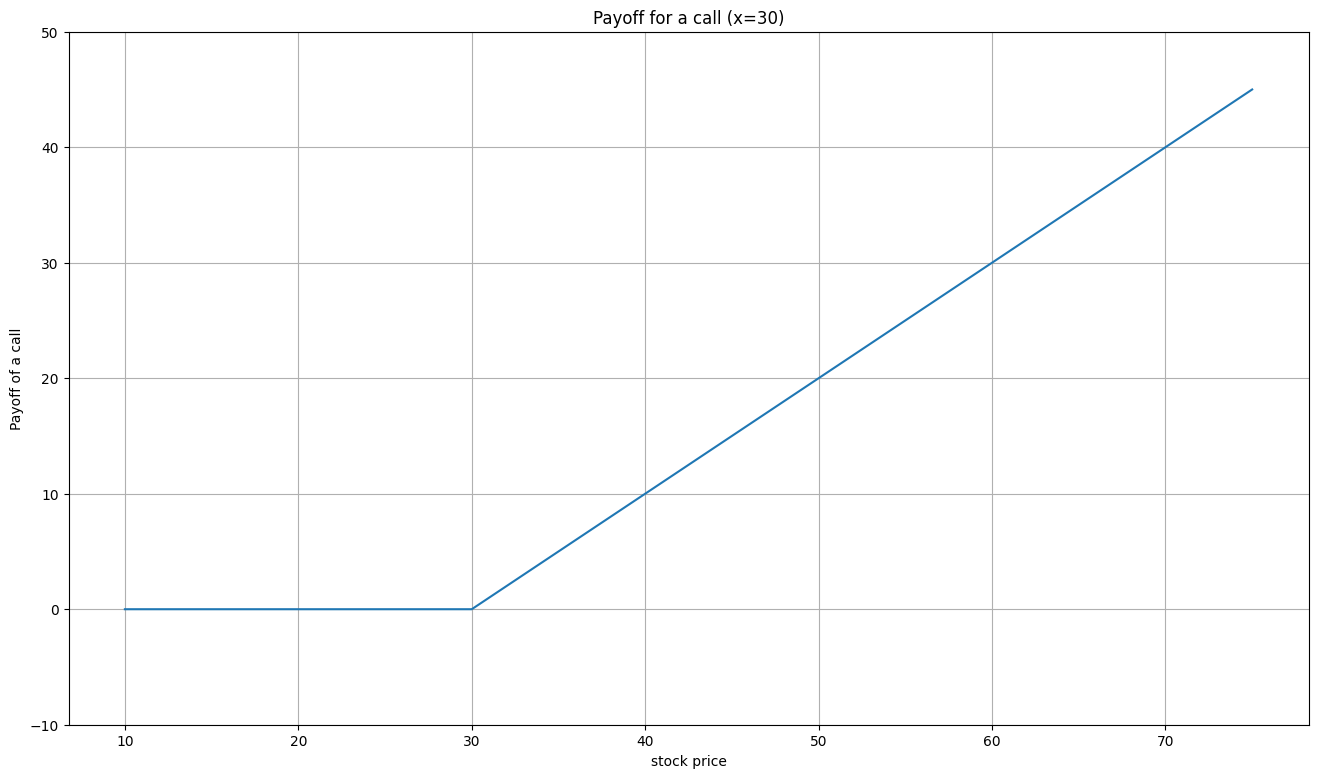

In [187]:
s = np.arange(10,80,5) #10 valore di inizio, 80 valore di fine, intervalli di 5
x=30
payoff=(abs(s-x)+s-x)/2 # modo strano per scrivere il payoff, ma è sempre la stessa cosa
plt.figure(figsize=(16,9))
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a call (x=30)")
plt.xlabel("stock price")
plt.ylabel("Payoff of a call")
plt.grid(True)
plt.show()

Profitti e perdite provenienti da acquisto o vendita di un'opzione call

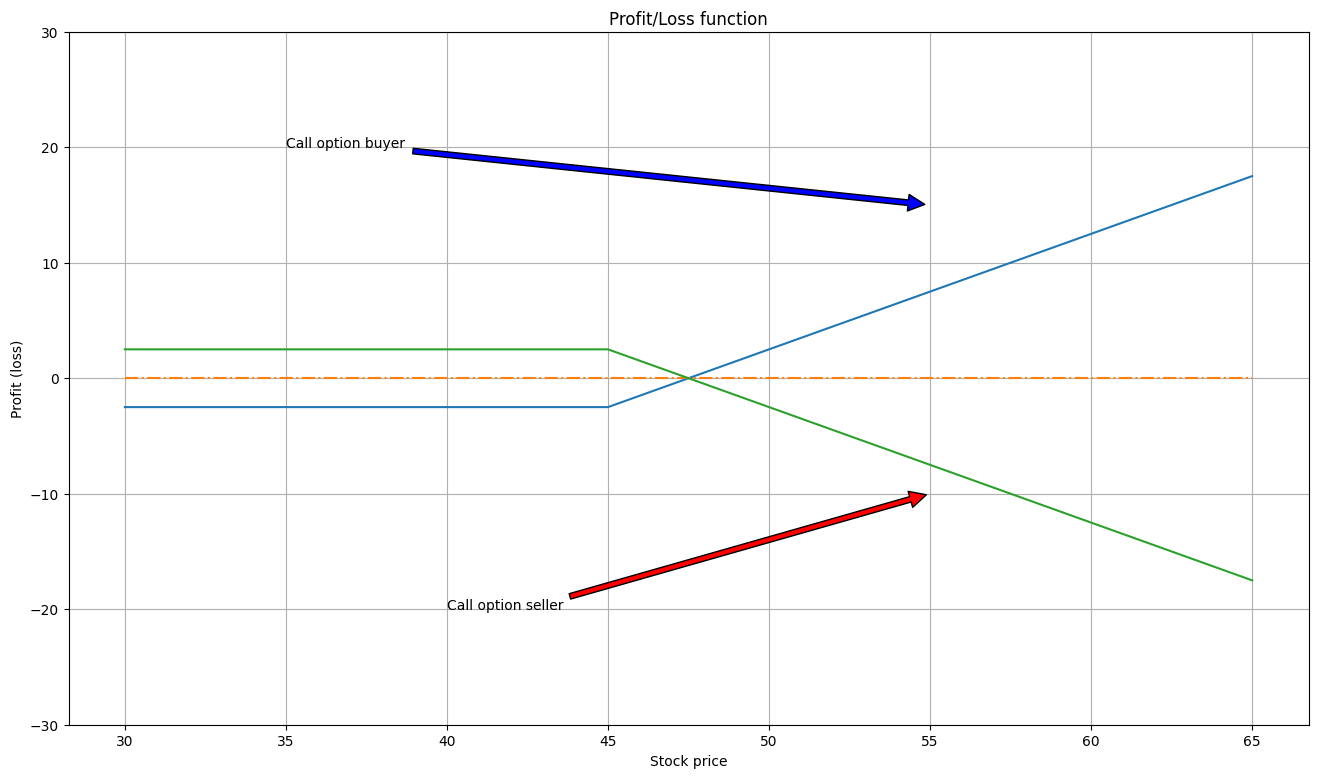

In [188]:
s = np.arange(30,70,5)
x=45;c=2.5
y=(abs(s-x)+s-x)/2 -c
y2=np.zeros(len(s))
plt.figure(figsize = (16,9))
plt.ylim(-30,30)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.title("Profit/Loss function")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Call option buyer', xy=(55,15), xytext=(35,20),
             arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20),
             arrowprops=dict(facecolor='red',shrink=0.01),)
plt.grid(True)
plt.show()

La linea verde rappresenta i profitti di chi emette l'opzione d'acquisto: colui che emette l'opzione di acquisto spera che il prezzo non salga oltre al prezzo di esercizio, in modo che l'opzione non venga esercitata (andando così ad incassare il premio senza nessuna perdita).<br>
La linea blu rappresenta i profitti di chi acquista l'opzione di acquisto: colui che compra l'opzione di acquisto spera che il prezzo salga oltre al prezzo di esercizio, così da poter esercitare l'opzione ed acquistare le le azioni ad un prezzo più conveniente rispetto all'attuale prezzo di mercato.

Profitti e perdite provenienti da acquisto o vendita di un'opzione put

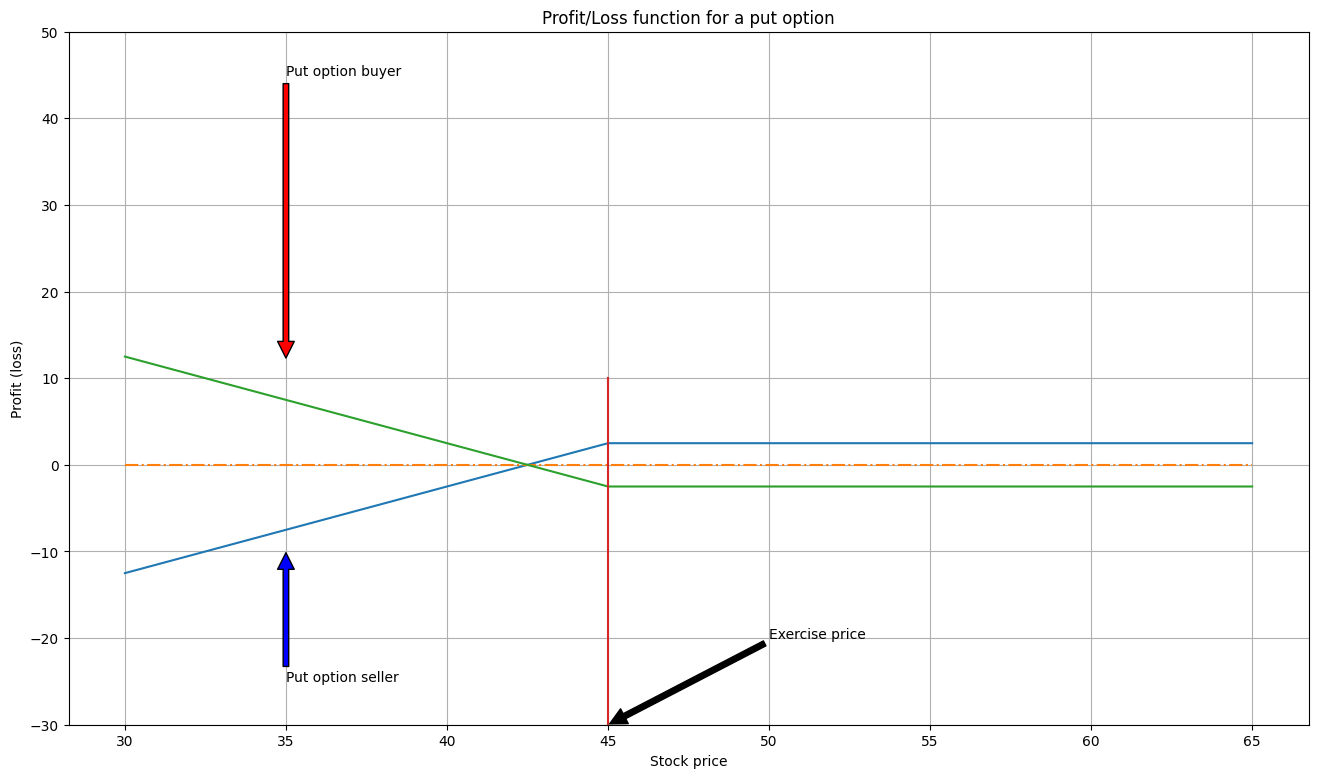

In [189]:


s = np.arange(30,70,5)
x=45;p=2;c=2.5
y=c-(abs(x-s)+x-s)/2 
y2=np.zeros(len(s))
plt.figure(figsize = (16,9))
x3=[x, x]
y3=[-30,10]
plt.ylim(-30,50)
plt.plot(s,y) 
plt.plot(s,y2,'-.') 
plt.plot(s,-y) 
plt.plot(x3,y3)
plt.title("Profit/Loss function for a put option") 
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,45), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Exercise price', xy=(45,-30), xytext=(50,-20), arrowprops=dict(facecolor='black',shrink=0.01),)
plt.grid(True)
plt.show()

La linea verde rappresenta i profitti di chi acquista l'opzione di vendita: colui che acquista l'opzione di vendita spera che il prezzo dell'azione scenda al di sotto del prezzo di esercizio, così da esercitare l'opzione e vendere le azioni ad un prezzo più conveniente rispetto all'attuale prezzo di mercato.<br>
La linea blu rappresenta i profitti di chi emette l'opzione di vendita: colui che emette l'opzione di vendita spera che il prezzo dell'azione rimanga al di sopra del prezzo di esercizio, in modo che l'opzione non venga esercitata (andando così ad incassare il premio senza nessuna perdita).

### Formula di Black-Scholes-Merton
Questa formula consente di calcolare il prezzo (attualizzato) delle opzioni; essa mette a confronto il prezzo di esercizio con la distribuzione di probabilità dei prezzi futuri per poter definire l'attuale valore dell'opzione.
La cosa interessante è che questa formula può essere vista come una regola per "replicare" un'opzione: il mercato delle opzioni non è gambling, gli operatori istituzionali e le banche di investimento vendono un'opzione e si coprono facendo delta hedging (farà vedere come funziona usando un excel, per ora ignoralo).

La formula di Black-Scholes-Merton si basa su una serie di ipotesi molto restrittive, come ad esempio il fatto che i rendimenti seguano la distribuzione normale, che i tassi di interessi siano costanti, ecc.
La conseguenza di questa divergenza tra formula e realtà è che le opzioni costano più di quanto in teoria dovrebbero costare (il quanto dipende da un sacco di fattori); la differenza la si vede nella cosiddetta volatilità implicita.

__PER CAPIRE__: la volatilità rappresenta l'unico dato non direttamente osservabile nel presente, si può soltanto misurare nel passato a posteriori.

$$f_{c}=S_{0}\ N(d_1)-Ke^{-rT}\ N(d_2),$$
$$f_p = Ke^{-rT}\ N (-d_2)-S_0\ N(-d_1),$$
 
where,
 
$$ d_1 = \frac{log(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt(T)}$$

$$ bins = \frac{max(values) - min(values)}{2 * \frac{IQR(values)}{\sqrt[3]{n}}$$

$$ d_2 = \frac{log(S_0/K)+(r-\sigma^2/2)T}{\sigma\sqrt(T)}=d_1-\sigma\sqrt{T}$$

$$ bins = \frac{max(values) - min(values)}{2 * \frac{IQR(values)}{\sqrt[3]{n}}$$

In [190]:
from scipy import stats 
def bs_call(S,X,T,r,sigma): # formula per calcolare il prezzo delle opzioni
    d1=(np.log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T)) 
    d2 = d1-sigma*np.sqrt(T)
    return S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2)
    

Altra formula 


https://www.youtube.com/watch?v=FzeXWMlTDHY&t=353s

In [191]:
def blackScholes(r, S, K, T, sigma, type = "C"): # altra formula per calcolare il prezzo delle opzioni
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "C":
            price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
        elif type == "P":
            price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    
    except:
        print("Please confirm all option parameters above")


In [192]:
c = bs_call(40, 45, 0.5, 0.05, 0.25) 
# prezzo attuale dell'azione, prezzo di esercizio, durata in anni dell'opzione, tasso di interesse risk-free, volatilità che riteniamo abbia il titolo
round(c, 3)

1.406

__RICORDA__: maggiore è la volatilità del titolo, maggiore è il rischio, maggiori sono le possibilità di guadagno.

Il tasso di interesse risk-free è usato per attualizzare il prezzo di esercizio (come al solito devo sempre tener conto del fatto che avrei potuto investire in risk-free nello stesso periodo di tempo).

### Strategie con opzioni
#### Lungo azione  corto opzione call

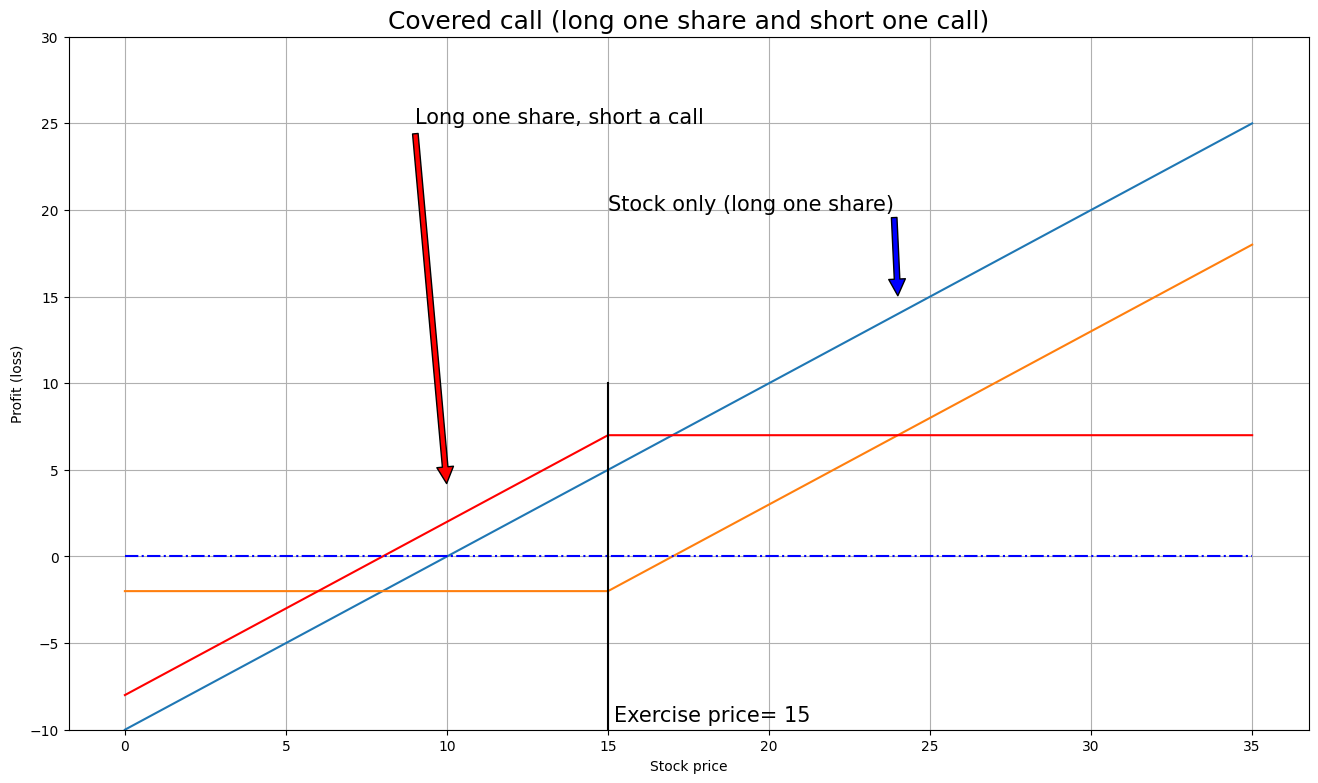

In [193]:
sT = np.arange(0,40,5) 
k=15;s0=10;c=2
y0=np.zeros(len(sT))
y1=sT-s0                    # stock only
y2=(abs(sT-k)+sT-k)/2-c     # long a call 
y3=y1-y2                    # covered-call 
plt.figure(figsize=(16,9))
plt.ylim(-10,30)
plt.plot(sT,y1) 
plt.plot(sT,y2) 
plt.plot(sT,y3,'red')
plt.plot(sT,y0,'b-.') 
plt.plot([k,k],[-10,10],'black')
plt.title('Covered call (long one share and short one call)', fontsize = 18) 
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Stock only (long one share)', xy=(24,15),xytext=(15,20), arrowprops=dict(facecolor='blue',shrink=0.01), fontsize = 15)
plt.annotate('Long one share, short a call', xy=(10,4), xytext=(9,25), arrowprops=dict(facecolor='red',shrink=0.01),fontsize = 15)
plt.annotate('Exercise price= '+str(k), xy=(k+0.2,-10+0.5), fontsize = 15)
plt.grid(True)
plt.show()

La linea azzurra rappresenta il profitto nel caso in cui l'investitore acquistasse direttamente l'azione: si tratta di un andamento lineare, in cui se l'azione sale il profitto sale mentre se l'azione scende il profitto scende.

La linea arancione rappresenta il profitto nel caso in cui l'investitore acquistasse un'opzione di acquisto (al posto dell'azione): se l'azione sale fino a superare la somma prezzo di esercizio + premio allora l'investitore ottiene profitto positivo, se invece l'azione dovesse scendere la perdita sarebbe limitata al solo premio.

La linea rossa rappresenta il profitto che si ottiene applicando la strategia covered-call (lungo azione, corto opzione call): la strategia consiste nell'enettere un'opzione per un'azione che si possiede.
Se il prezzo dell'azione dovesse scendere, la perdita sarebbe ridotta grazie al fatto di aver intascato il premio dell'opzione; se il prezzo dell'azione dovesse salire invece non si avrebbe il guadagno che invece si avrebbe possedendo la sola azione (l'opzione viene esercitata e lo prendo nel culo).

__PER CAPIRE__: la strategia covered-call è vantaggiosa se il prezzo dell'azione coinvolta varia poco (se varia leggermente in negativo la perdita è compensata dal premio, se varia leggermente in positivo si ha il guadagno dato dall'aumento del prezzo e dal premio).

#### Long Straddle - Comprare una call e una put con lo stesso prezzo di esercizio

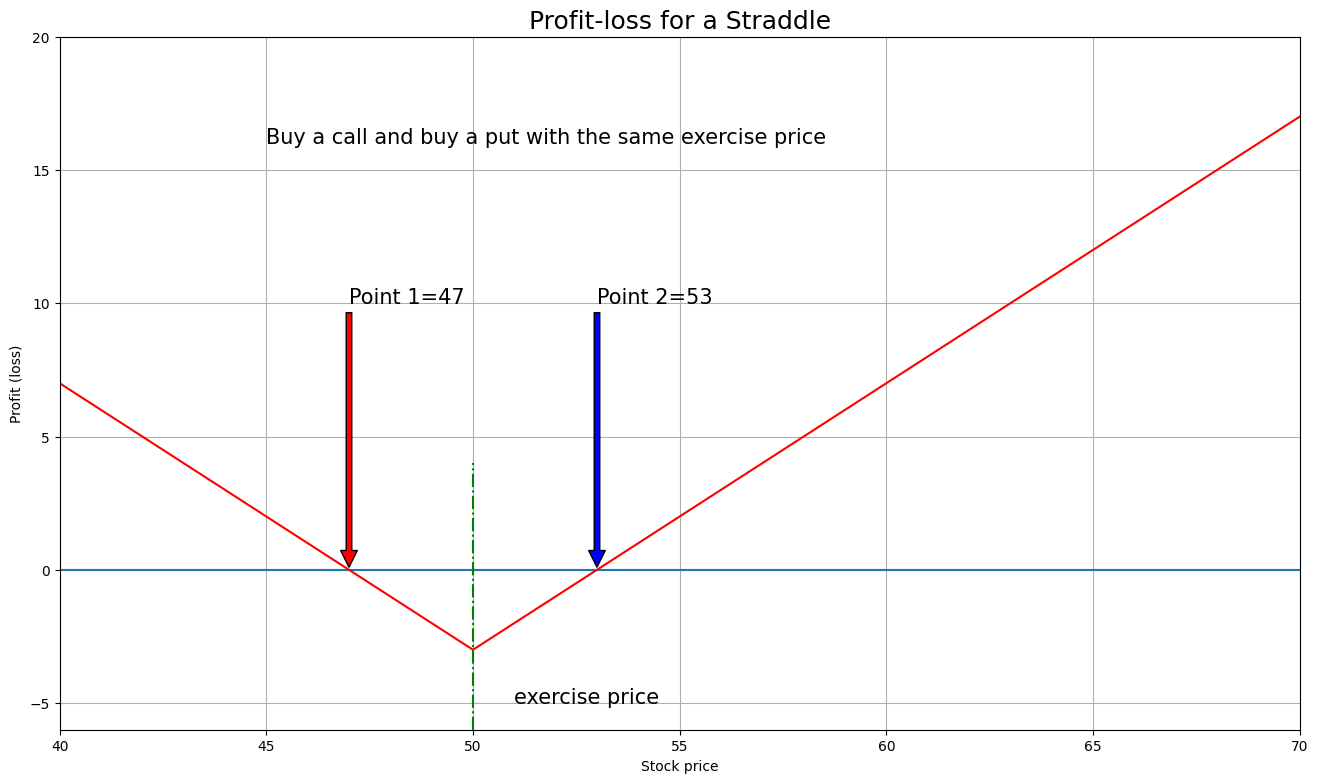

In [194]:
import matplotlib.pyplot as plt 
import numpy as np
sT = np.arange(30,80,5)
x=50;	c=2; p=1
straddle=(abs(sT-x)+sT-x)/2-c + (abs(x-sT)+x-sT)/2-p 
y0=np.zeros(len(sT))
plt.figure(figsize = (16,9))
plt.ylim(-6,20) 
plt.xlim(40,70) 
plt.plot(sT,y0) 
plt.plot(sT,straddle,'r')
plt.plot([x,x],[-6,4],'g-.')
plt.title("Profit-loss for a Straddle", fontsize = 18) 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)')
plt.annotate('Point 1='+str(x-c-p), xy=(x-p-c,0), xytext=(x-p-c,10),
arrowprops=dict(facecolor='red',shrink=0.01),fontsize = 15) 
plt.annotate('Point 2='+str(x+c+p), xy=(x+p+c,0), xytext=(x+p+c,10),
arrowprops=dict(facecolor='blue',shrink=0.01),fontsize = 15) 
plt.annotate('exercise price', xy=(x+1,-5),fontsize = 15)
plt.annotate('Buy a call and buy a put with the same exercise price',xy=(45,16), fontsize = 15)
plt.grid()
plt.show()

Comprare una call option ed una put option entrambe allo stesso prezzo di esercizio è utile quando si è sicuri che il prezzo di mercato si allontanerà dal prezzo di esercizio (ma non si sa in quale direzione).

#### Calcolo del delta di un'opzione

Il _delta_ di un'opzione rappresenta come varia il prezzo dell'opzione al variare del prezzo dell'azione sottostante (soggiacente); esso dice inoltre quanto titolo comprare per essere coperto se ho venduto l'opzione (??).


Formula chiusa

In [195]:
def delta1(S,X,T,r,sigma): # prezzo di mercato, prezzo di esercizio, durata in anno, tasso di interesse, volatilità
    d1 = (np.log(S/X) + (r + sigma*sigma/2.)* T)/ (sigma*np.sqrt(T))
    return stats.norm.cdf(d1)

In [196]:
delta1(40,40,0.5,0.03,0.2)

0.5701581024006669

Calcolo diretto

In [197]:
def delta2(S,X,T,r,sigma): # prezzo di mercato, prezzo di esercizio, durata in anno, tasso di interesse, volatilità
    s1 = S
    s2 = S + 1e-9
    c1 = bs_call(s1, X, T, r, sigma)
    c2 = bs_call(s2, X, T, r, sigma)
    delta = (c2 - c1) / (s2 - s1)
    return delta

In [198]:
delta2(40,40,0.5,0.03,0.2)

0.5701592331796187

### Put call parity

Consideriamo un'opzione call (C) ed un'opzione put (P) entrambe aventi lo stesso soggiacente (avente prezzo di mercato S), lo stesso prezzo di esercizio X e la stessa data di scadenza T. <br>
Fatte queste premesse, allora vale la seguente formula $$ C + Xe^{-rT} = P + S $$
La formula afferma che il prezzo della call più il valore attualizzato del prezzo di esercizio è uguale al prezzo della put più il valore corrente dell'azione.

L'opzione call (C) può essere vista come possedere le azioni (S) ed un'opzione put (P), entrambe finanziate con il valore attualizzato del prezzo di esercizio alla scadenza, in formule $$ C = P + S - Xe^{-rT} $$

Al contrario si può costruire un'opzione put vendendo allo scoperto un titolo (quindi guadagnando nel caso in cui il titolo dovesse scendere di prezzo) e comprando una call per coprire il rischio che il titolo salga.

__PER CAPIRE__: La put-call parity stabilisce che la differenza tra il prezzo di una call e una put con le stesse caratteristiche (stesso sottostante, prezzo di esercizio e scadenza) deve essere uguale alla differenza tra il prezzo del sottostante e il valore attuale del prezzo di esercizio scontato al tasso privo di rischio: questo serve per garantire che non si possa effettuare arbitraggio tra le opzioni call e put.

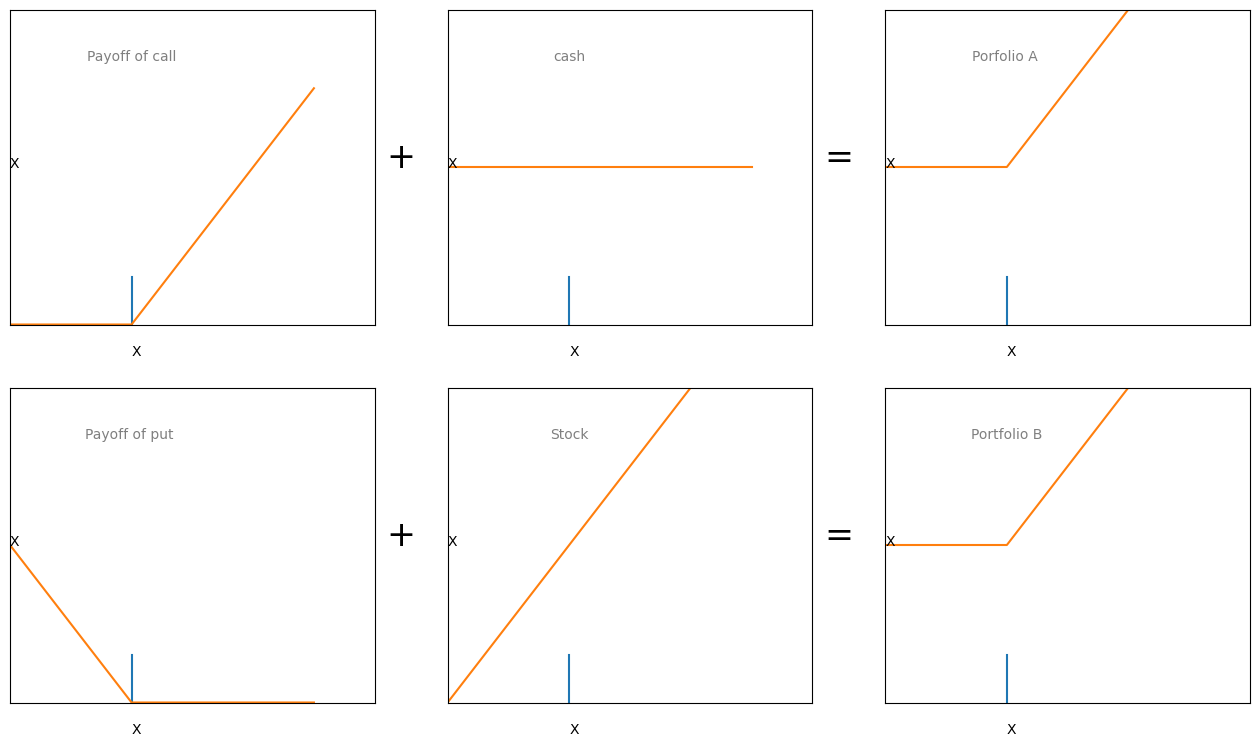

In [199]:
import pylab as pl 
import numpy as np 
x=10
sT=np.arange(0,30,5) 
payoff_call=(abs(sT-x)+sT-x)/2 
payoff_put=(abs(x-sT)+x-sT)/2 
cash=np.zeros(len(sT))+x

def graph(text,text2=''): 
    pl.xticks(())
    pl.yticks(())
    pl.xlim(0,30)
    pl.ylim(0,20) 
    pl.plot([x,x],[0,3])
    pl.text(x,-2,"X");
    pl.text(0,x,"X")
    pl.text(x,x*1.7, text, ha='center', va='center',size=10, alpha=.5) 
    pl.text(-5,10,text2,size=25)
    
pl.figure(figsize=(16, 9))
pl.subplot(2, 3, 1); graph('Payoff of call');	   pl.plot(sT,payoff_call) 
pl.subplot(2, 3, 2); graph('cash','+');	         pl.plot(sT,cash)
pl.subplot(2, 3, 3); graph('Porfolio A ','=');   pl.plot(sT,cash+payoff_call)
pl.subplot(2, 3, 4); graph('Payoff of put ');	   pl.plot(sT,payoff_put) 
pl.subplot(2, 3, 5); graph('Stock','+');	   pl.plot(sT,sT)
pl.subplot(2, 3, 6); graph('Portfolio B','=');   pl.plot(sT,sT+payoff_put) 
pl.show()


Parametri iniziali

In [200]:
r = 0.01
S = 35
K = 40
T = 1
sigma = 0.30

Funzione Black Scholes

In [201]:
def blackScholes(r, S, K, T, sigma, type = "C"):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "C":
            price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
        elif type == "P":
            price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    
    except:
        print("Please confirm all option parameters above")


In [202]:
# prova
P = blackScholes(r, S, K, T, sigma, type = "C")
P

2.515055958704906

### Simulazioni con opzione call

#### Variazione del prezzo dell'opzione al variare del prezzo dell'azione sottostante
Durata (T) = 1 anno <br>
Tasso d'interesse (r) = 1% <br>
Prezzo di esercizio (K) = 40 <br>
volatilità (sigma) = 0.30 <br>
Prezzo di mercato (S) da 1 a 40 <br>

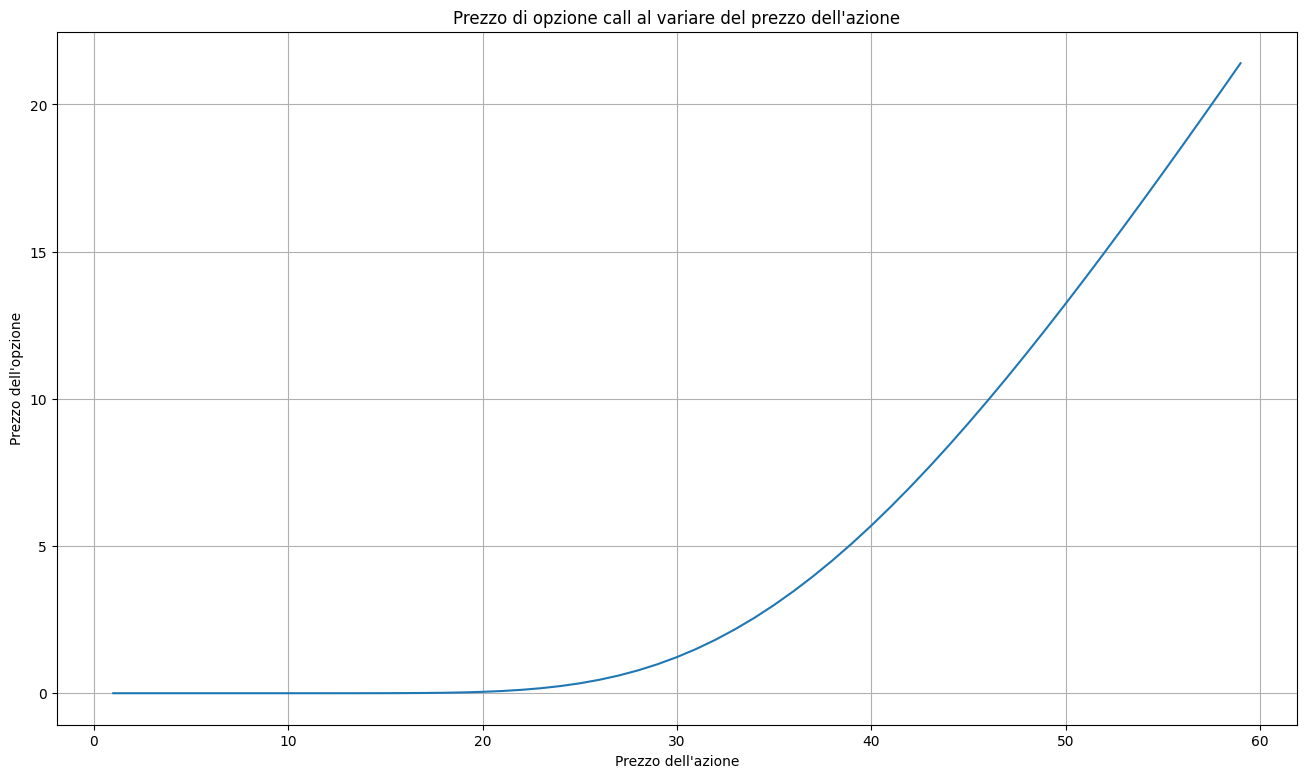

In [203]:
stock_price = []
opt_price = []


r = 0.05
#S = 40
K = 40 
T = 1
sigma = 0.30

for S in range(1,60):
    P = blackScholes(r, S, K, T, sigma, type = "C")
    stock_price.append(S)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(stock_price, opt_price)

plt.xlabel("Prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del prezzo dell'azione");


#### Variazione del prezzo dell'opzione al variare della volatilità
Durata (T) = 1 anno <br>
Tasso d'interesse (r) = 1% <br>
 Prezzo di esercizio (K) = 40 <br>
 Prezzo di mercato (S) = 30 <br>
 Volatilità (sigma) da 5% a 50% <br>

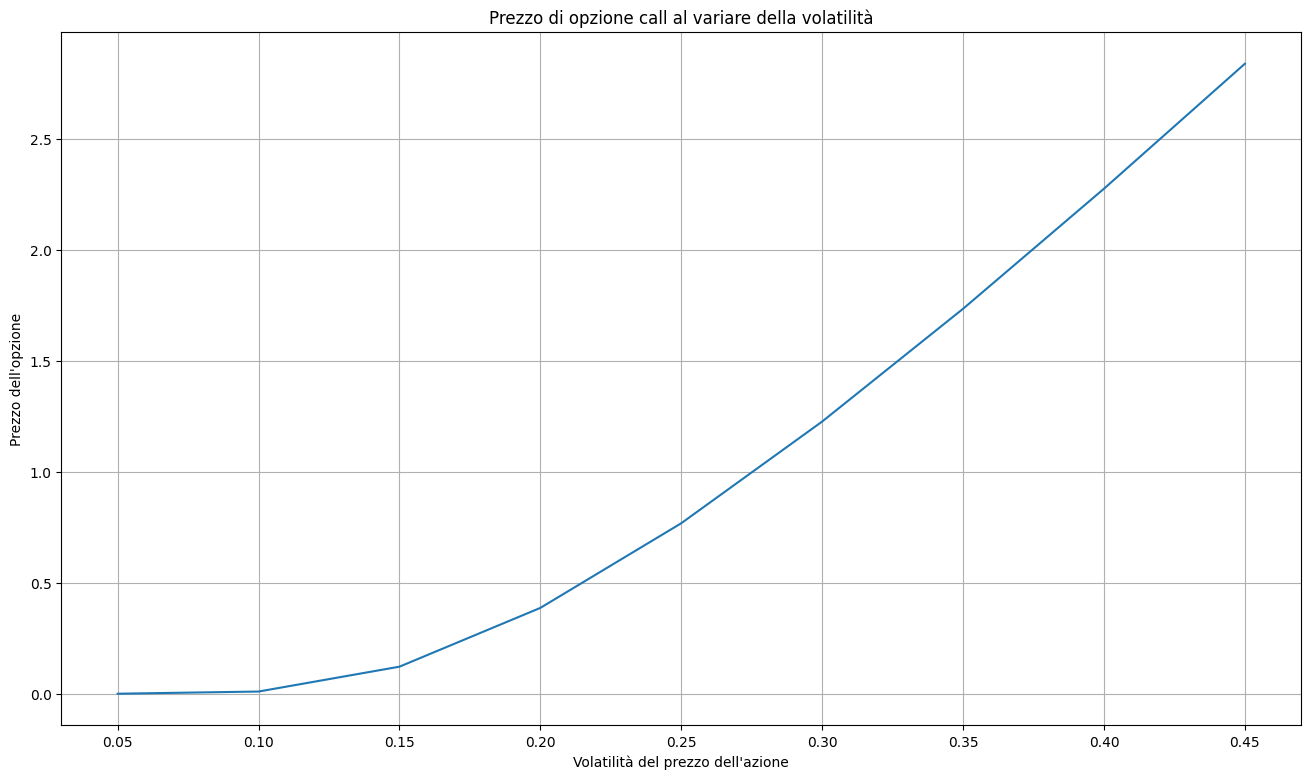

In [204]:
vola = []
opt_price = []


r = 0.05
S = 30
K = 40
T = 1
# sigma = 0.30

for sigma in range(5, 50, 5):
    sigma  = sigma/100
    P = blackScholes(r, S, K, T, sigma, type = "C")
    vola.append(sigma)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(vola, opt_price)
plt.xlabel("Volatilità del prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare della volatilità");


#### Variazione del prezzo dell'opzione al variare del tasso d'interesse
Durata (T) = 1 anno <br>
Tasso d'interesse (r) da 1% a 10% <br>
Prezzo di esercizio (K) = 40 <br>
volatilità (sigma) = 0.30 <br>
Prezzo di mercato (S) = 30 <br>

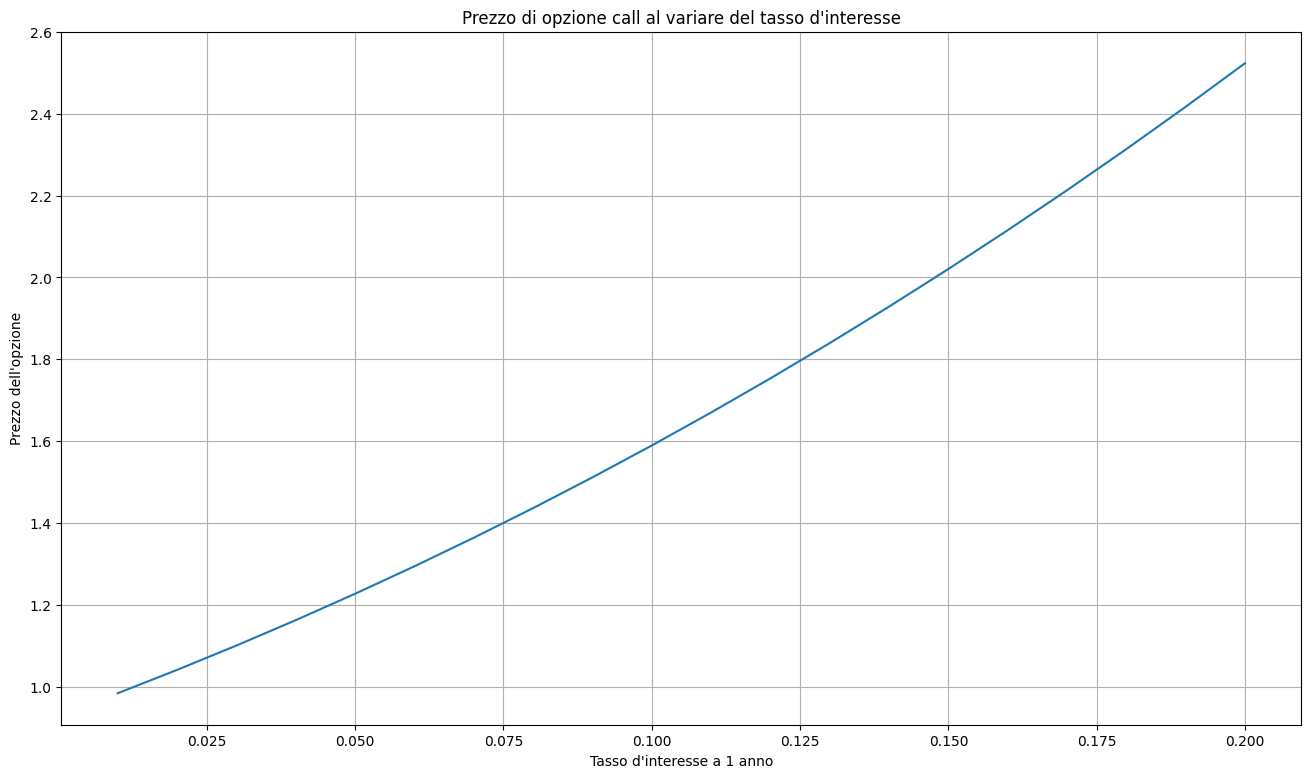

In [205]:
tasso = []
opt_price = []


#r = 0.01
S = 30
K = 40
T = 1
sigma = 0.30

for r in range(1,21):
    r = r/100
    P = blackScholes(r, S, K, T, sigma, type = "C")
    tasso.append(r)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(tasso, opt_price)
plt.xlabel("Tasso d'interesse a 1 anno")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del tasso d'interesse");


### Simulazioni con opzione put

### Variazione del prezzo dell'opzione al variare del prezzo dell'azione sottostante
Durata (T) = 1 anno <br>
Tasso d'interesse (r) = 1% <br>
Prezzo di esercizio (K) = 40 <br>
volatilità (sigma) = 0.30 <br>
Prezzo di mercato (S) da 1 a 40 <br>

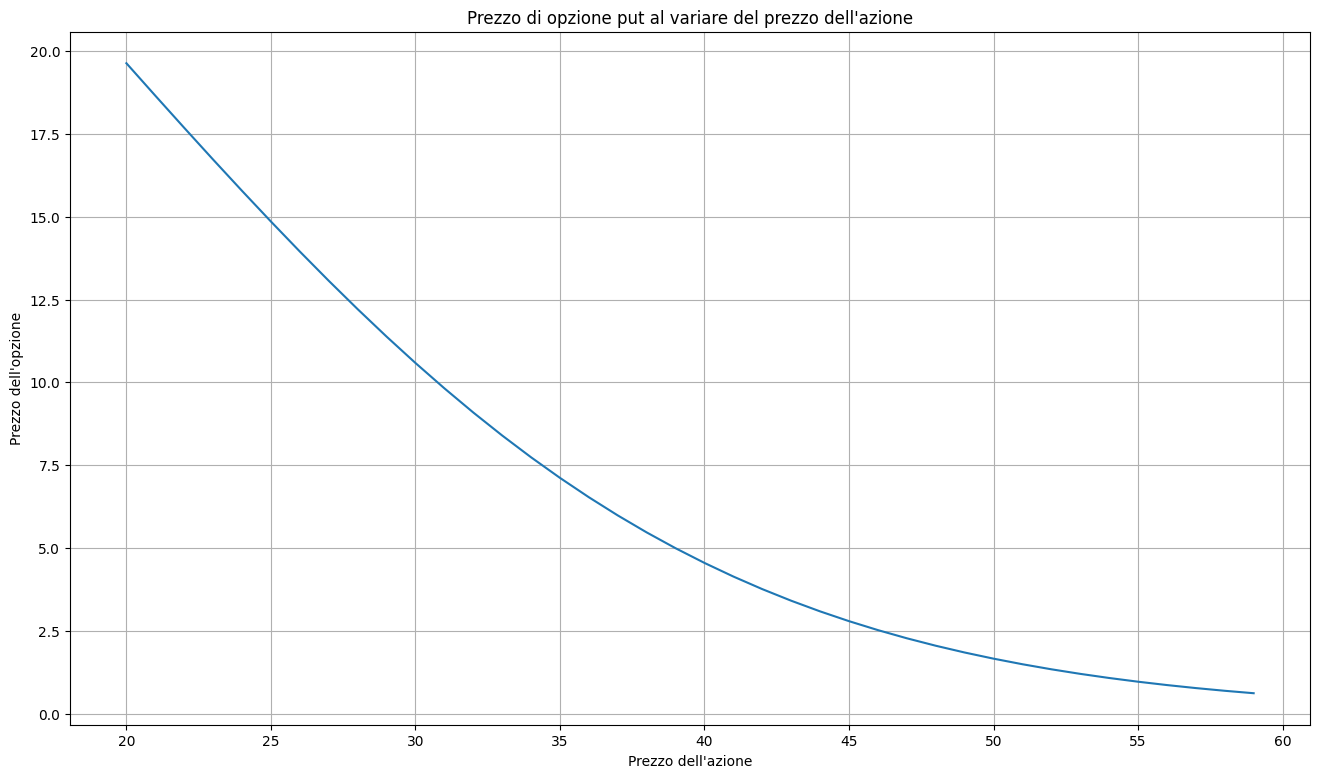

In [206]:
stock_price = []
opt_price = []


r = 0.01
#S = 40
K = 40
T = 1
sigma = 0.30

for S in range(20,60):
    P = blackScholes(r, S, K, T, sigma, type = "P")
    stock_price.append(S)
    opt_price.append(P)
plt.figure(figsize=(16,9))
plt.plot(stock_price, opt_price)
plt.xlabel("Prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione put al variare del prezzo dell'azione");


#### Variazione del prezzo dell'opzione al variare della volatilità
Durata (T) = 1 anno <br>
Tasso d'interesse (r) = 1% <br>
Prezzo di esercizio (K) = 40 <br>
Prezzo di mercato (S) = 30 <br>
Volatilità (sigma) da 5% a 50% <br>

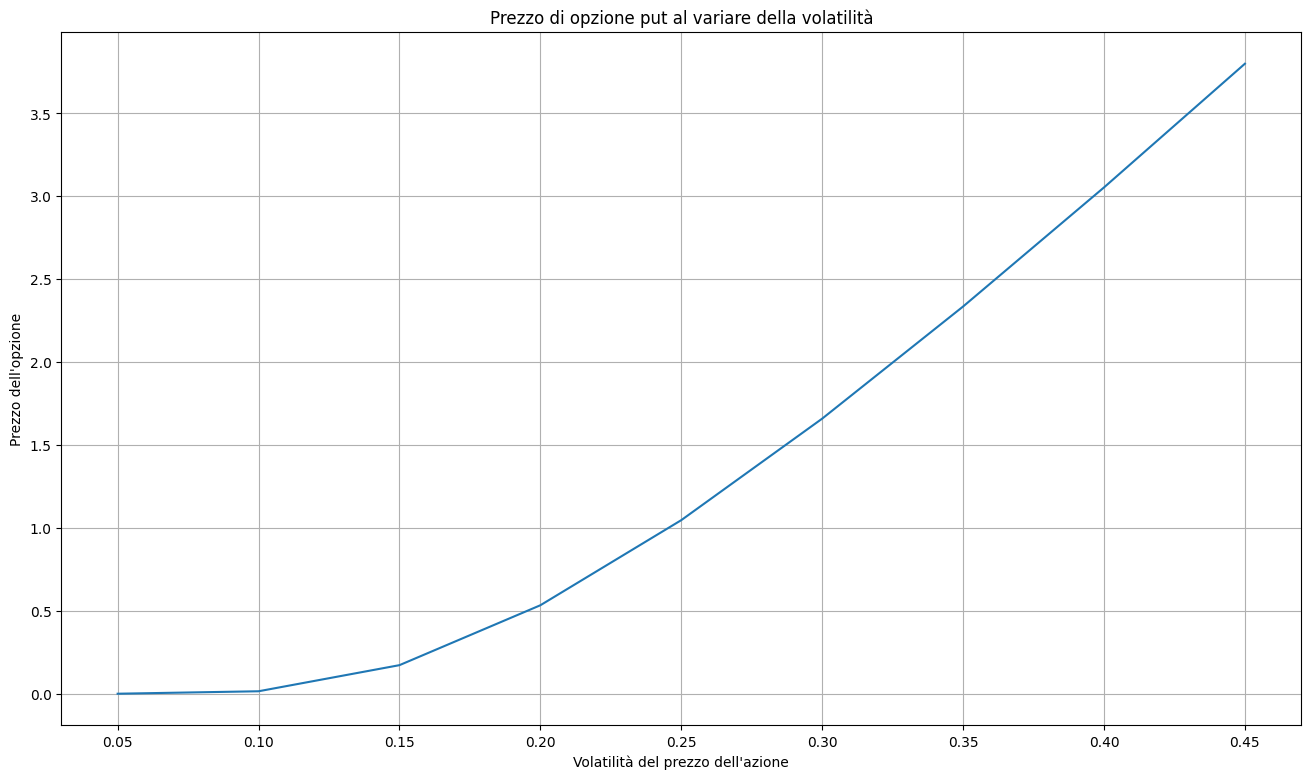

In [207]:
vola = []
opt_price = []


r = 0.01
S = 50
K = 40
T = 1
# sigma = 0.30

for sigma in range(5, 50, 5):
    sigma  = sigma/100
    P = blackScholes(r, S, K, T, sigma, type = "P")
    vola.append(sigma)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(vola, opt_price)
plt.xlabel("Volatilità del prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione put al variare della volatilità");


#### Variazione del prezzo dell'opzione al variare del tasso d'interesse
Durata (T) = 1 anno <br>
Tasso d'interesse (r) da 1% a 10% <br>
Prezzo di esercizio (K) = 40 <br>
volatilità (sigma) = 0.30 <br>
Prezzo di mercato (S) = 30 <br>

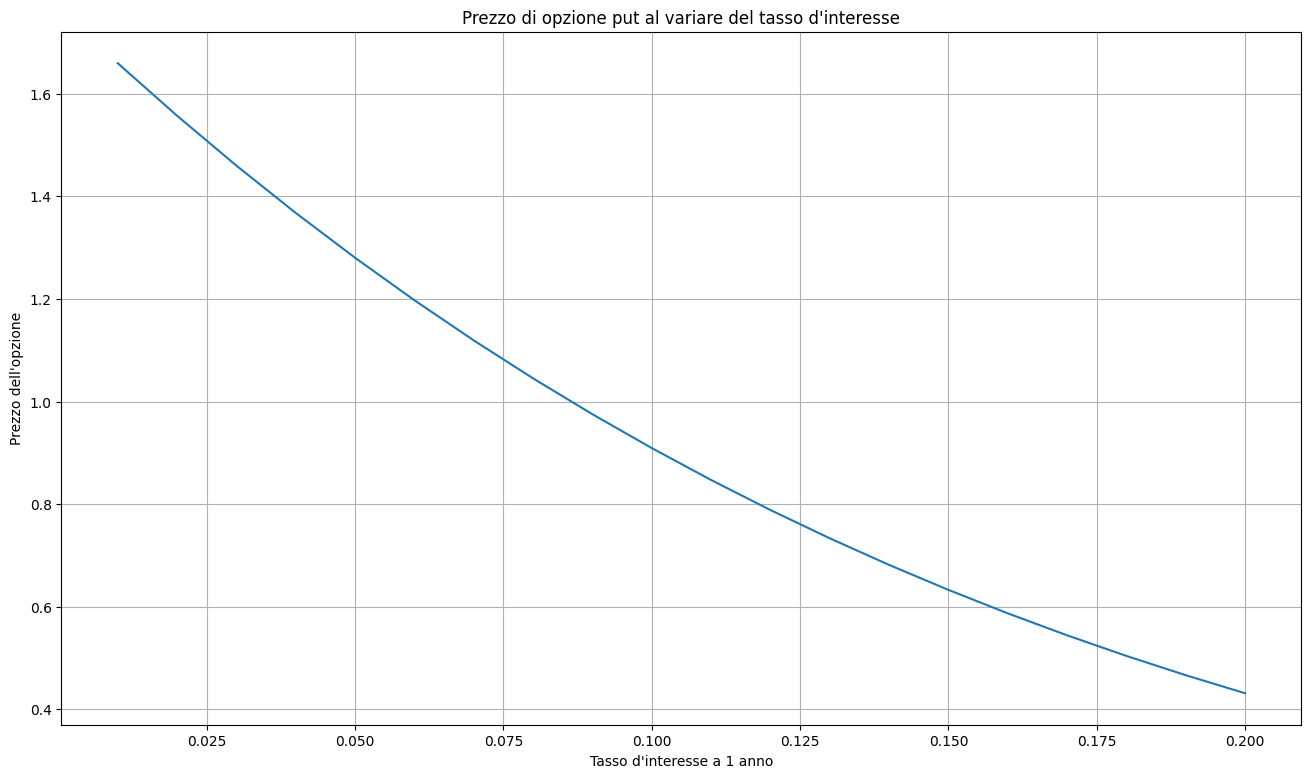

In [208]:
tasso = []
opt_price = []


#r = 0.01
S = 50
K = 40
T = 1
sigma = 0.30

for r in range(1,21):
    r = r/100
    P = blackScholes(r, S, K, T, sigma, type = "P")
    tasso.append(r)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(tasso, opt_price)
plt.xlabel("Tasso d'interesse a 1 anno")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione put al variare del tasso d'interesse");


### Prezzo di opzione europea tramite simulazione Monte Carlo - 2 righe di codice
https://www.youtube.com/watch?v=LqZ3A86LjD0&t=33s
anche Hilpisch (2019) pag. 375

In [209]:
from numpy import *

In [210]:
k = random.randn(252); # crea 252 valori casuali (252 giorni lavorativi l'anno) con distribuzione normale (media 0 e deviazione standard 1)

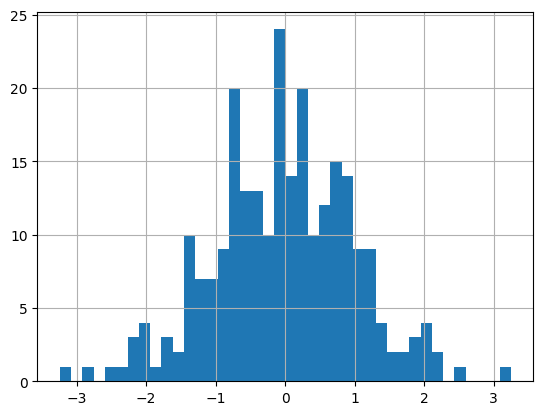

In [211]:
plt.hist(k,40)
plt.grid(True)
plt.show()

In [212]:
#applichiamo i numeri casuali alla volatilità
k = random.randn(100000)*0.30/sqrt(252)
# genera 100k numeri casuali con una volatilità del 30% (che è espressa su base annua, divide per radice di 252 per trasformarla in volatilità giornaliera)

__NB__: secondo la teoria del moto browniano geometrico e il teorema del limite centrale, la volatilità su un intervallo di tempo più breve (ad esempio, un giorno) si riduce rispetto alla volatilità su un intervallo di tempo più lungo (ad esempio, un anno); per questo motivo (in qualche modo) si ottiene la volatilità giornaliera a partire da quella annuale in quella maniera lì.

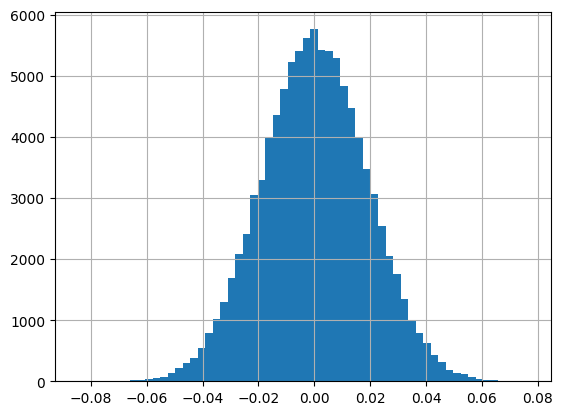

In [213]:
plt.hist(k,60)
plt.grid(True)
plt.show()

Creiamo un "Moto Geometrico Browniano" (GBM) per descrivere il prezzo dell'azione nel tempo

Due proprietà:
- le vaziazioni dei prezzi sono propozionali al livello dei prezzi
- i prezzi non vanno mai sotto zero

Calcoliamo il prezzo di un'opzione call europea con prezzo di esercizio 40, prezzo attuale 30, volatilità 30% e tasso d'interesse 1%

In [214]:
k = cumprod(1 + random.randn(1000)*0.30/sqrt(252)) # generiamo 1000 rendimenti e facciamo la produttoria per simulare l'andamento dei rendimenti del titolo

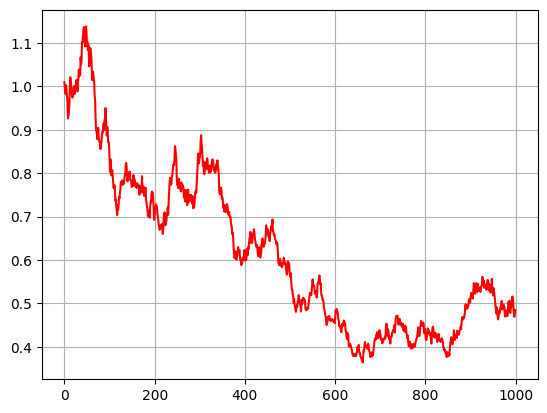

In [215]:
plt.plot(k, 'r')
plt.grid(True)

In [216]:
# Creriamo 1000 percorsi della durata di un anno
k = cumprod(1 + random.randn(1000, 252)*0.30/sqrt(252),1)

In [217]:
k.shape

(1000, 252)

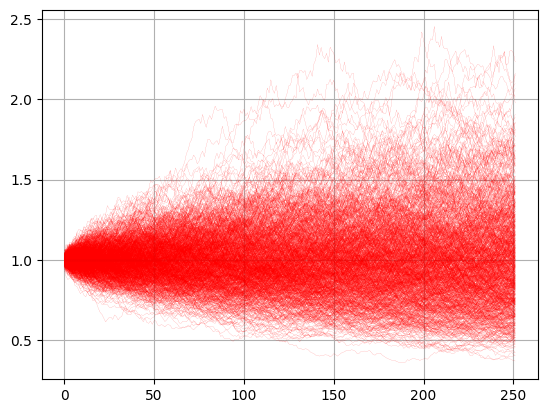

In [218]:
for i in k:
    plt.plot(i, 'r', linewidth = '0.07')
    plt.grid(True);

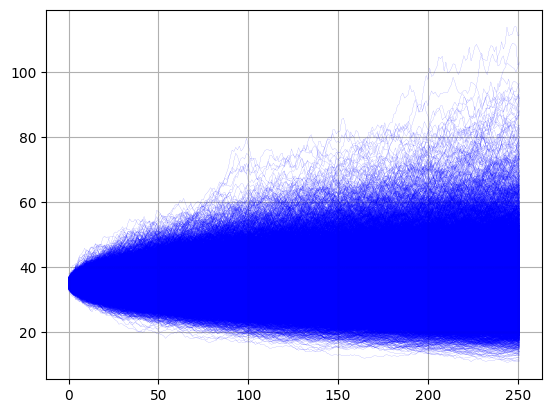

In [219]:
# Applichiamo il GBM a un prezzo iniziale 
k = cumprod(1 + random.randn(10000, 252)*0.30/sqrt(252),1) * 35 # 35 prezzo iniziale dell'azione
for i in k:
    plt.plot(i, 'b', linewidth = '0.07')
    plt.grid(True)

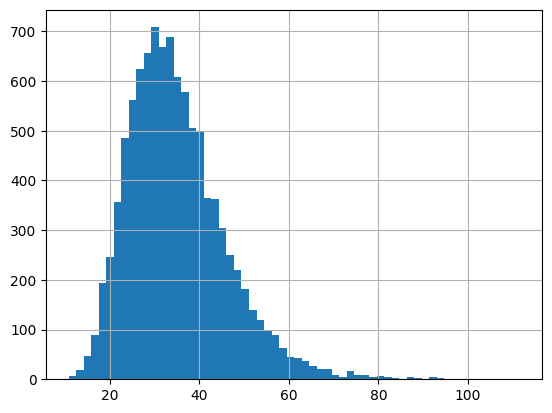

In [220]:
# Per calcolare il prezzo di un'opzione put o call europea basta l'ultimo prezzo di ogni percorso
plt.hist(k[:,-1],60) # k[:,-1] vuol dire "tutte le righe dell'ultima colonna"
plt.grid(True);
# la distribuzione dei prezzi finali non è normale (è log-normale)

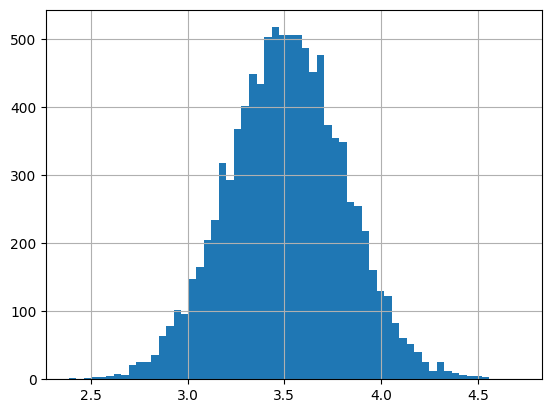

In [221]:
plt.hist(np.log(k[:,-1]),60)
plt.grid(True);
# la distribuzione dei logaritmi dei prezzi finali lo è

In [222]:
np.exp(-r*1) * mean((k[:,-1] - 40) * ((k[:,-1]-40)>0))

1.9994188080304838

### Implied volatility

In [223]:
#from scipy import log,exp,sqrt,stats

def implied_vol_call(S,X,T,r,c):
    for i in range(2000):
        sigma=0.005*(i+1)
        d1=(np.log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        diff=c-(S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2))
        if abs(diff)<=0.01:
            return i,sigma, diff


In [224]:
implied_vol_call(40, 45, 0.5, 0.03, 0.812)


(39, 0.2, 0.00022441106579473846)

### Indice VIX

In [225]:
from pylab import mpl, plt
#plt.style.use('seaborn')
#mpl.rcParams['font.family'] = 'serif'
start = dt.date(2014,5,31)
end = dt.date(2024,4,30)
df = yf.download(['^VIX','^GSPC'], start, end)

NameError: name 'dt' is not defined

In [ ]:
df.head()

In [ ]:
df = df['Adj Close']
df.head()

In [ ]:
df.plot(subplots=True, figsize=(10,6), grid = True);

#### Correlazione fra rendimenti del S&P 500 e del VIX

Hilpisch (2019) Python for Finance, pagg. 222 - 228

Visualizziamo la tendenza di VIX e S&P500 a muoversi in direzioni opposte

In [ ]:
df.loc[:'2024-4-30'].plot(secondary_y='^VIX', figsize=(19,6), grid = True);

Lavoriamo sui rendimenti anziché sui livelli

In [ ]:
rets = np.log(df / df.shift(1))


In [ ]:
rets.rename(columns={'^VIX': 'VIX', 
                           '^GSPC': 'SPX'}, inplace=True)

In [ ]:
rets.dropna(inplace = True)
rets.head()

In [ ]:
rets.plot(subplots=True, grid = True, figsize=(19,9));

Evidenziamo la correlazione negativa fra rendimenti del S&P500 e variazioni del VIX

In [ ]:
pd.plotting.scatter_matrix(rets, alpha=0.5,
           diagonal = 'hist',
                  hist_kwds={'bins': 50},
                  figsize = (19,9), grid = True);

Stimiamo la relazione lineare fra i due

In [ ]:
reg = np.polyfit(rets['SPX'], rets['VIX'], deg=1)

In [ ]:
ax = rets.plot(kind = 'scatter', x = 'SPX', y= 'VIX', figsize=(19,8))
ax.plot(rets['SPX'], np.polyval(reg, rets['SPX']), 'r', lw=2);

Evoluzione nel tempo della correlazione

In [ ]:
rets.corr()

In [ ]:
rets.cov()

In [ ]:
ax = rets['SPX'].rolling(window=252).corr(rets['VIX']).plot(figsize=(19,9))
ax.axhline(rets.corr().iloc[0,1], c='r')
plt.grid()

### SKEW

The Cboe SKEW index (SKEW) measures potential risk in financial markets.

Much like the VIX index, the SKEW index from the Chicago Board Options Exchange (Cboe) can be a proxy for investor sentiment and volatility. 

The SKEW measures perceived tail-risk in the S&P 500. Tail-risk is a change in the price of the S&P 500 or a stock that would place it on either of the tail ends, or the far edges of the normal distribution curve. These price changes typically have a low probability. 

The SKEW index is calculated using S&P 500 options that measure tail risk—returns two or more standard deviations from the mean—in S&P 500 returns over the next 30 days. The primary difference between the VIX and the SKEW is that the VIX is based upon implied volatility round the at-the-money (ATM) strike price while the SKEW considers implied volatility of out-of-the-money (OTM) strikes. 

SKEW values generally range from 100 to 150 where the higher the rating, the higher the perceived tail risk and chance of a black swan event. A SKEW rating of 100 means the perceived distribution of S&P 500 returns is normal and, therefore, the probability of an outlier return is small. 



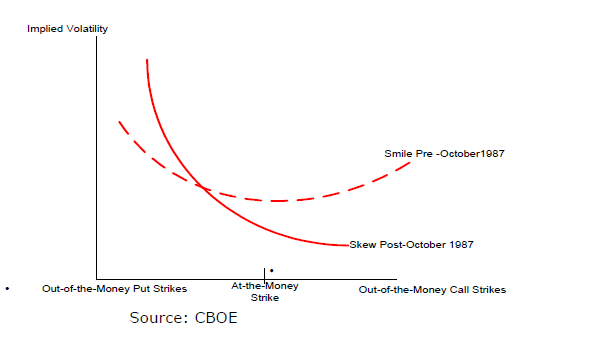

In [ ]:
skew = yf.download(['^VIX','^SKEW'], start, end)

In [ ]:
SKEW = skew['Adj Close']
SKEW.head()

In [ ]:
SKEW.tail()

In [ ]:
SKEW.plot(secondary_y='^VIX', figsize=(19,6), grid = True);

### Scarico dati su opzioni da Yahoofinance

https://www.fintut.com/yahoo-finance-options-python/


## Strategie opzionali - Indici

BXM The CBOE S&P 500 BuyWrite Index
BXM is a benchmark index designed to track the performance of a hypothetical buy-write strategy on the S&P 500 Index.

BXMD The CBOE S&P 50 030-Delta  BuyWrite Inde
BXMD is a variation of the Cboe BuyWrite Index (BXM) that  tracks the value of a hypothetical portfolio (BXMD portfolio) that overlays  a short 30-delta call option on the S&P 500® (30-delta SPX call) instead of an-at-the-money option.  The smaller premium of a 30-delta call relative to an-at-the-money call provides  a smaller buffer but also less giveup on the upside. }
PUT CBOE S&P 500 PutWrite Iex
nd
PUT , measures the performance of a hypothetical portfolio that sells S&P 500 Index (SPX) put options against collateralized cash reserves held in a money market accotuOE
PPUT The CBOE S&P 500 5% Put Protectiondex In
PPindex ex is designed to track the performance of a hypothetical strategy that holds a long position indexed to the S&P 500 Index and buys a monthly 5% out-of-the-money (OTM) S&P 500 Index (SPX) put option as a hed


CLL The CBOE S&P 500 95-110 Collar index
CLL is a passive collar strategy that entails holding the stocks in the S&P 500 Index; buying three-month S&P 500 put options to protect this S&P 500 portfolio from market decreases; and selling one month S&P 500 call options to help finance the cost of the puts
e.
PPUT3M The Cboe S&P 500 Tail  Index
s
ex (PPT3M) is a benchmark index designed to track the performance of a hypothetical risk-management strategy that consists of (a) holding the S&P 500 portfolio and collecting dividends and (b) buying 10% out-of-the-money SPX puts that expire on the quarterly cycle, i.e. March, June, September and Dber puts.euts.
VXTH The CBOE VIX Tail  Index
H
ndex(VXTH) tracks a hypothetical portfolio long the S&P 500 index, with dividends, and long one-month 30-delta VIX calls. The number of calls depends on the level of forward volatim/VXTH


In [ ]:
opt_stra = pd.read_excel('Opt_strat.xlsx', index_col = 0, parse_dates = True)

In [ ]:
opt_stra_1987 = opt_stra.drop(['VXTH','PPUT3M'], axis = 1)

In [ ]:
opt_ret = (opt_stra_1987/opt_stra_1987.shift(1))-1
opt_ret.dropna(inplace=True)

In [ ]:
(opt_ret).describe()

In [ ]:
opt_ret.plot(kind = 'scatter', x = 'SPXT', y = 'PPUT', figsize = (19,6))
plt.grid()

In [ ]:
opt_ret.plot(kind = 'scatter', x = 'SPXT', y = 'PUT', figsize = (19,6))
plt.grid()

In [ ]:
opt_ret_std = np.std(opt_ret, axis = 0)*np.sqrt(12)

In [ ]:
opt_ret_std

In [ ]:
opt_ret_mean = np.mean(opt_ret, axis = 0)*12
opt_ret_mean

In [ ]:
opt_ret_mean_excess = opt_ret_mean - opt_ret_mean['TB3MS']

In [ ]:
opt_ret_mean_excess/opt_ret_std

In [ ]:
opt_ret.corr()

In [ ]:
opt_ret_all = opt_stra/opt_stra.shift(1)-1

In [ ]:
opt_ret_all.dropna(inplace= True)

In [ ]:
opt_ret_all.describe()

In [ ]:
opt_ret_all.corr()

### Altri indici di volatilità: cambi e obbligazioni

In [ ]:
vola = pd.read_excel('indici_vola.xlsx', parse_dates = True, index_col = 0)

In [ ]:
vola.head()

In [ ]:
vola.plot()
plt.grid()

In [ ]:
vola[['MOVE','VIX']].plot(figsize=(19,6), grid = True);

In [ ]:
vola[['JPMVXYG7','JPMVXYEM']].plot(figsize=(19,6), grid = True);